# Import Necessary Libraries

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Collection & Preprocessing

# Load the Dataset

In [7]:
# Provide the correct path to your dataset
file_path = "C:\\Users\\Maha\\Desktop\\University\\Year 5\\Fall 2024\\Data Mining\\Project\\cyber crimes 4.csv"
# Load the data
data = pd.read_csv(file_path, encoding='latin1')

# Explore the data
print(data.head())
print(data.info())
print(data.describe())


              states               crime type  Year  Revenge /Settling scores  \
0     Andhra Pradesh  Cyber Crimes By Motives  2022                        10   
1  Arunachal Pradesh  Cyber Crimes By Motives  2022                         0   
2              Assam  Cyber Crimes By Motives  2022                         0   
3              Bihar  Cyber Crimes By Motives  2022                         0   
4       Chhattisgarh  Cyber Crimes By Motives  2022                         0   

   Greed/ Money  Extortion  Cause Disrepute  \
0            42          0                0   
1             0          0                0   
2             0          0                0   
3           157          0                3   
4             0          2                0   

   Prank/ Satisfaction of Gaining Control   Fraud/ Illegal Gain  \
0                                        0                  219   
1                                        0                    0   
2                            

# Preprocessing

Remove Redundant Columns and Normalize coulumn names for easier handling

In [8]:
# Preprocessing: Drop redundant columns and normalize column names
data_cleaned = data.drop(columns=['crime type'])
data_cleaned.columns = data_cleaned.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

# Features and target selection
features = data_cleaned.iloc[:, 2:-1]  # Motive-related columns
target = data_cleaned['total']         # Total crimes column as the target



# Exploratory Data Analysis (EDA)

1. Total Cybercrimes by State

    Analyze crime trends across states and categories

C:\Users\Maha\AppData\Local\Temp\ipykernel_20104\3841196683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_crimes_by_state.values, y=total_crimes_by_state.index, palette='viridis')


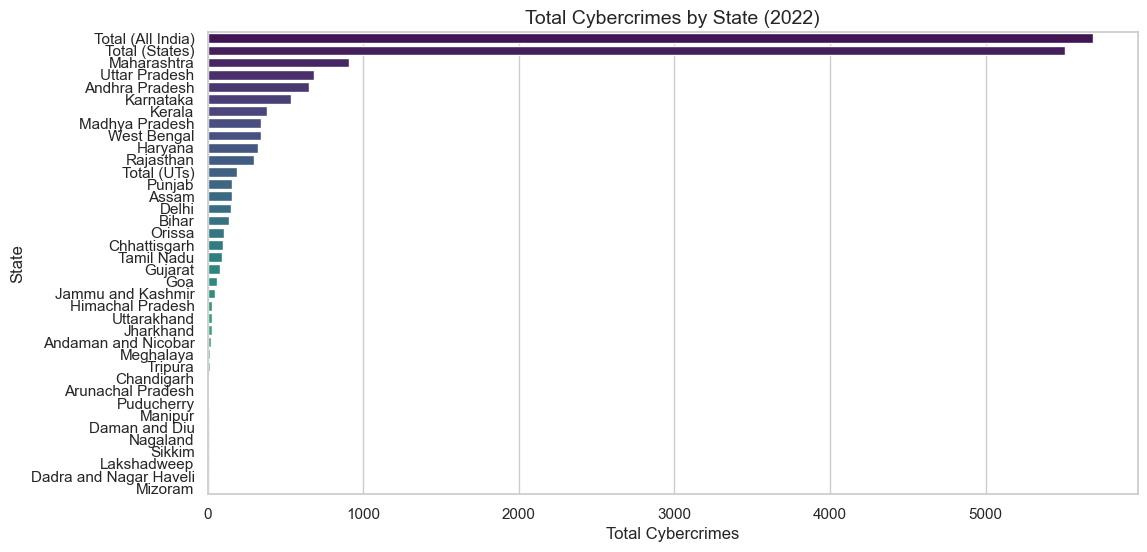

In [9]:
# Exploratory Data Analysis (Visualization)
sns.set(style="whitegrid")

# Total crimes by state
plt.figure(figsize=(12, 6))
total_crimes_by_state = data_cleaned.groupby('states')['total'].sum().sort_values(ascending=False)
sns.barplot(x=total_crimes_by_state.values, y=total_crimes_by_state.index, palette='viridis')
plt.title("Total Cybercrimes by State (2022)", fontsize=14)
plt.xlabel("Total Cybercrimes", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()

2. Contributions of Different Motives

    Explore correlations between motives and total crimes

C:\Users\Maha\AppData\Local\Temp\ipykernel_20104\385942588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motive_contributions.index, y=motive_contributions.values, palette='coolwarm')


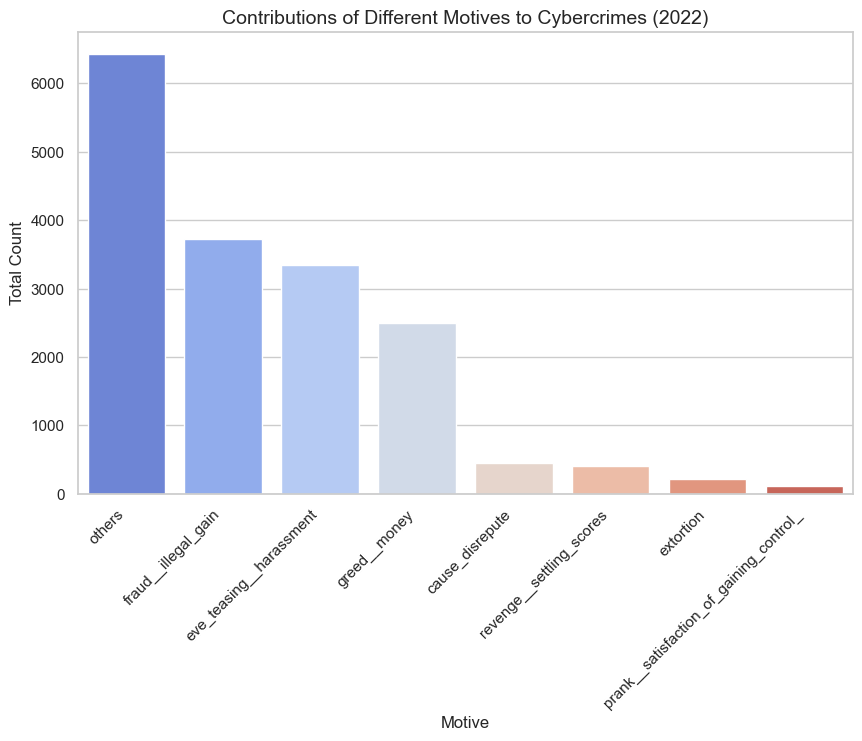

In [10]:
# Contributions of different motives
motive_columns = data_cleaned.columns[2:-1]  # Exclude states, year, and total
motive_contributions = data_cleaned[motive_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=motive_contributions.index, y=motive_contributions.values, palette='coolwarm')
plt.title("Contributions of Different Motives to Cybercrimes (2022)", fontsize=14)
plt.xlabel("Motive", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Model Preparation

Categorize the target variable

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
# Categorize the target variable
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # 3 categories: low, medium, high
target_binned = binner.fit_transform(target.values.reshape(-1, 1)).astype(int).flatten()


In [12]:
# Optionally, check the resulting binned target
print(target_binned[:10])  # Print first 10 values to verify


[0 0 0 0 0 0 0 0 0 0]


Splitting of dataset into Trainingset (70%) and Testing sets (30%)

In [13]:
# Stratified split of the data
X_train, X_test, y_train_binned, y_test_binned = train_test_split(
    features, target_binned, test_size=0.3, random_state=42, stratify=target_binned
)

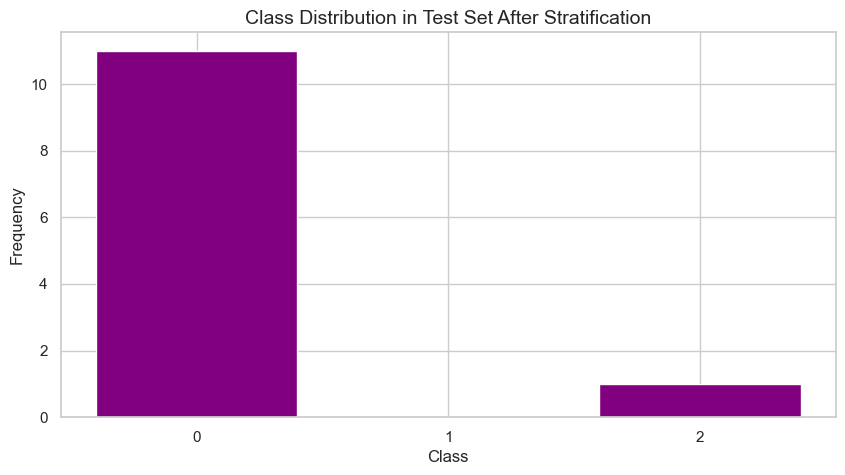

In [14]:
# Visualize class distribution in the testing set after stratification
plt.figure(figsize=(10, 5))
plt.bar(
    pd.Series(y_test_binned).value_counts().index,
    pd.Series(y_test_binned).value_counts().values,
    color='purple'
)
plt.title("Class Distribution in Test Set After Stratification", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([0, 1, 2])
plt.show()


In [15]:
# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train_binned)


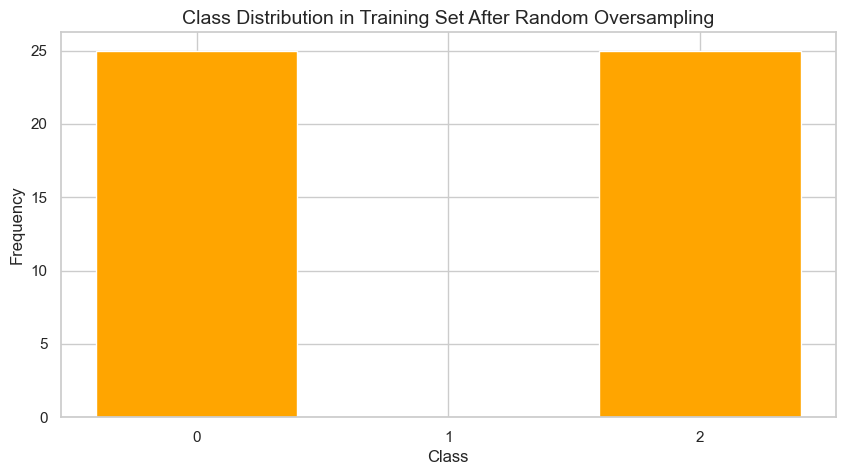

In [16]:
# Visualize class distribution after Random Oversampling
plt.figure(figsize=(10, 5))
plt.bar(
    pd.Series(y_train_balanced).value_counts().index,
    pd.Series(y_train_balanced).value_counts().values,
    color='orange'
)
plt.title("Class Distribution in Training Set After Random Oversampling", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([0, 1, 2])
plt.show()

# MODEL SELECTION & JUSTIFICATION

Model Selection and Training

In [17]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = rf_classifier.predict(X_test)

# MODEL EVALUATION & METRICS

Assess performance using metrics such as Training Accuracy, Testing Accuracy, Precision, Recall, and F1 Score

In [19]:
# Training accuracy
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train_binned, y_train_pred)  # Use y_train_binned here
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Testing accuracy
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test_binned, y_test_pred)  # Use y_test_binned here
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [21]:
report = classification_report(y_test_binned, y_test_pred)  # Use y_test_binned here
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

